In [1]:
import matplotlib.pyplot as plt

# TEST case 1 (epoxy in sulphuric acid)

In [3]:
import pandas as pd

#df = pd.read_csv('test1.csv')
df = pd.read_excel('test_cases.xlsx', sheet_name = 'test1')
n = len(df)

df.iloc[0:n,:]

,Concentration,Temperature,Resistance
0,20,60,6
1,40,40,2
2,60,22,2
3,80,22,2
4,98,22,2


In [14]:
#df1 = df.sort_values('Concentration', axis = 0, ascending = True)
df2 = df.sort_values('Temperature', axis = 0, ascending = True)
df2

,Concentration,Temperature,Resistance
2,60,22,2
3,80,22,2
4,98,22,2
1,40,40,6
0,20,60,6


In [5]:
import numpy as np

mapping = {(x, y): z for (x, y, z) in df[["Concentration", "Temperature", "Resistance"]].values}

mat = np.zeros((n, n))

conc = df['Concentration']
temp = df['Temperature']

#tt = []
for i, x in np.ndenumerate(conc):
#    print(i,x)
    for j, y in np.ndenumerate(temp):
#        print(x, y)
#        tt.append(y)
        mat[j, i] = mapping.get((x, y), 0)  
       

print(mat)

[[6. 0. 0. 0. 0.]
 [0. 6. 0. 0. 0.]
 [0. 0. 2. 2. 2.]
 [0. 0. 2. 2. 2.]
 [0. 0. 2. 2. 2.]]


In [6]:
r, c = np.tril_indices_from(mat)

# determine fillable slots
newr = np.array([], dtype = int)
newc = np.array([], dtype = int)
for i in range(len(r)):
    if mat[r[i], c[i]] == 0 :
        newr = np.append(newr, r[i])
        newc = np.append(newc, c[i])
        
# First Cycle Based on Column
value = df[temp == max(temp)]['Resistance']
for i in range(len(newr)):
    mat[newr[i], newc[i]] = value
    
# Second Cycle Based on Rows
value = df[conc == max(conc)]['Resistance']
chckmat = np.copy(mat)
for i in range(len(newr)):
    chckmat[newr[i], newc[i]] = value
    
# Condition Check
if chckmat[0, 0] < chckmat[-1, 0]:
    finalmat = chckmat
else:
    finalmat = mat
    
print(finalmat)

[[6. 0. 0. 0. 0.]
 [6. 6. 0. 0. 0.]
 [6. 6. 2. 2. 2.]
 [6. 6. 2. 2. 2.]
 [6. 6. 2. 2. 2.]]


Text(0, 0.5, 'Temperature (C)')

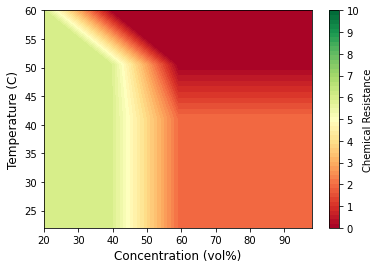

In [9]:
#%matplotlib notebook
%matplotlib inline
#plt.imshow(mat, cmap = '')
#min(conc), max(conc), min(temp), max(temp)
levels = np.linspace(0, 10)
img = plt.contourf(finalmat, extent = [min(conc), max(conc), max(temp), min(temp)], levels = levels, cmap = 'RdYlGn')
#plt.grid()
bounds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#pylab.colorbar(ticks = bounds)

plt.colorbar(img, ticks = bounds, label = 'Chemical Resistance')
#plt.clim(0,10)
plt.xlabel('Concentration (vol%)', fontsize = 12.0)
plt.ylabel('Temperature (C)', fontsize = 12.0)
#plt.title('{} {}'.format(conc, temp))

In [26]:
#Z = df.Resistance

min(conc), max(conc), min(temp), max(temp)

(20, 98, 22, 60)

In [13]:
%matplotlib notebook

#plt.imshow(mat, cmap = '')
levels = np.linspace(0, 10)
img = plt.contourf(finalmat, extent = [min(conc), max(conc), max(temp), min(temp)], levels = levels, cmap = 'RdYlGn')
#plt.grid()
bounds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#pylab.colorbar(ticks = bounds)

plt.colorbar(img, ticks = bounds, label = 'Chemical Resistance')
#plt.clim(0,10)
plt.xlabel('Concentration (vol%)', fontsize = 12.0)
plt.ylabel('Temperature (C)', fontsize = 12.0)
#plt.title('{} {}'.format(conc, temp))


<IPython.core.display.Javascript object>

Text(0.5, 1.0, '0    20\n1    40\n2    60\n3    80\n4    98\nName: Concentration, dtype: int64, 0    60\n1    40\n2    22\n3    22\n4    22\nName: Temperature, dtype: int64')

# TEST case 2

In [19]:
df = pd.read_excel('test2.xlsx', 0)
n = len(df)
df.iloc[0:n,:]

,Concentration,Temperature,Resistance
0,10,60,6
1,30,22,7


In [20]:
df = df.sort_values('Temperature', axis = 0, ascending = False)
df

,Concentration,Temperature,Resistance
0,10,60,6
1,30,22,7


In [21]:
mapping = {(x, y): z for (x, y, z) in df[["Concentration", "Temperature", "Resistance"]].values}

mat = np.zeros((n, n))
conc = df['Concentration']
temp = df['Temperature']

for i, x in np.ndenumerate(conc):
    for j, y in np.ndenumerate(temp):
        mat[j, i] = mapping.get((x, y), 0)

        
print(mat)

[[6. 0.]
 [0. 7.]]


In [22]:
r, c = np.tril_indices_from(mat)

# determine fillable slots
newr = np.array([], dtype = int)
newc = np.array([], dtype = int)
for i in range(len(r)):
    if mat[r[i], c[i]] == 0 :
        newr = np.append(newr, r[i])
        newc = np.append(newc, c[i])
        
# First Cycle Based on Column
value = df[temp == max(temp)]['Resistance']
for i in range(len(newr)):
    mat[newr[i], newc[i]] = value
    
# Second Cycle Based on Rows
value = df[conc == max(conc)]['Resistance']
chckmat = np.copy(mat)
for i in range(len(newr)):
    chckmat[newr[i], newc[i]] = value
    
# Condition Check
if chckmat[0, 0] < chckmat[-1, 0]:
    finalmat = chckmat
else:
    finalmat = mat
    
print(finalmat)

[[6. 0.]
 [7. 7.]]


In [23]:
min(conc), max(conc), min(temp), max(temp)

(10, 30, 22, 60)

<IPython.core.display.Javascript object>


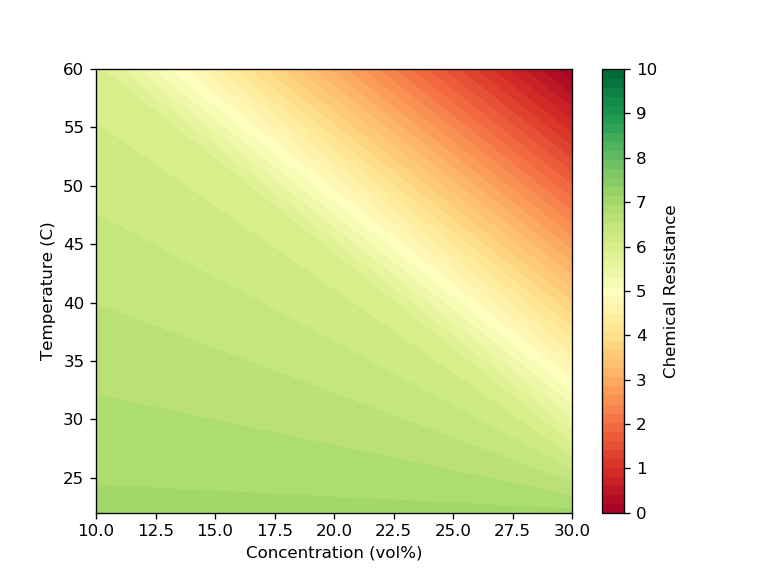

Text(0, 0.5, 'Temperature (C)')

In [24]:
%matplotlib notebook

#plt.imshow(mat, cmap = '')
levels = np.linspace(0, 10)
bounds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
img = plt.contourf(finalmat, extent = [min(conc), max(conc), max(temp), min(temp)], levels = levels, cmap = 'RdYlGn')
#plt.grid()

plt.colorbar(img, ticks = bounds, label = 'Chemical Resistance')

plt.xlabel('Concentration (vol%)')
plt.ylabel('Temperature (C)')
#pylab.title('')


# TEST case 3

In [25]:
df = pd.read_excel('test3.xlsx', 0)
n = len(df)
df.iloc[0:n,:]

,Concentration,Temperature,Resistance
0,10,22,7
1,20,150,6
2,35,22,7


In [26]:
df = df.sort_values('Temperature', axis = 0, ascending = False)
df

,Concentration,Temperature,Resistance
1,20,150,6
0,10,22,7
2,35,22,7


In [27]:
mapping = {(x, y): z for (x, y, z) in df[["Concentration", "Temperature", "Resistance"]].values}

mat = np.zeros((n, n))
conc = df['Concentration']
temp = df['Temperature']

for i, x in np.ndenumerate(conc):
    for j, y in np.ndenumerate(temp):
        mat[j, i] = mapping.get((x, y), 0)

        
print(mat)

[[6. 0. 0.]
 [0. 7. 7.]
 [0. 7. 7.]]


In [28]:
r, c = np.tril_indices_from(mat)

# determine fillable slots
newr = np.array([], dtype = int)
newc = np.array([], dtype = int)
for i in range(len(r)):
    if mat[r[i], c[i]] == 0 :
        newr = np.append(newr, r[i])
        newc = np.append(newc, c[i])
        
# First Cycle Based on Column
value = df[temp == max(temp)]['Resistance']
for i in range(len(newr)):
    mat[newr[i], newc[i]] = value
    
# Second Cycle Based on Rows
value = df[conc == max(conc)]['Resistance']
chckmat = np.copy(mat)
for i in range(len(newr)):
    chckmat[newr[i], newc[i]] = value
    
# Condition Check
if chckmat[0, 0] < chckmat[-1, 0]:
    finalmat = chckmat
else:
    finalmat = mat
    

print(finalmat)

[[6. 0. 0.]
 [7. 7. 7.]
 [7. 7. 7.]]


In [29]:
min(conc), max(conc), min(temp), max(temp)

(10, 35, 22, 150)

<IPython.core.display.Javascript object>


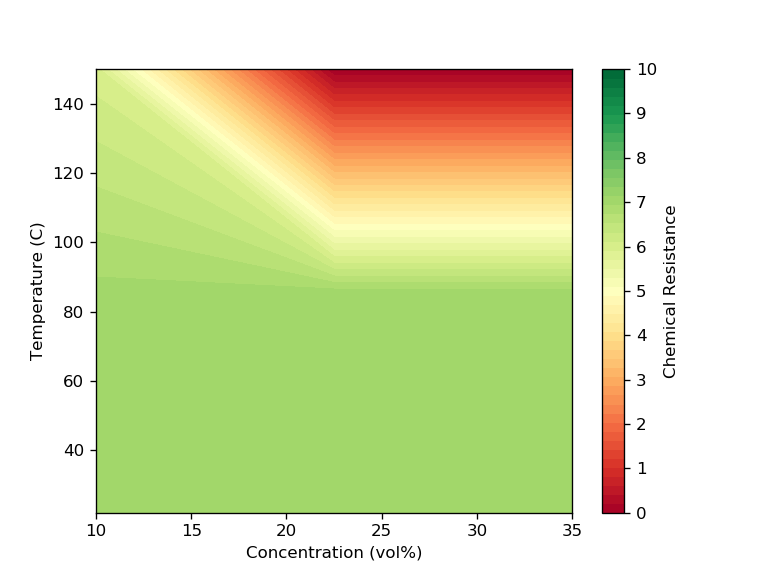

Text(0, 0.5, 'Temperature (C)')

In [30]:
%matplotlib notebook

#plt.imshow(mat, cmap = '')
levels = np.linspace(0, 10)
bounds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
img = plt.contourf(finalmat, extent = [min(conc), max(conc), max(temp), min(temp)], levels = levels, cmap = 'RdYlGn')
#plt.grid()

plt.colorbar(img, ticks = bounds, label = 'Chemical Resistance')

plt.xlabel('Concentration (vol%)')
plt.ylabel('Temperature (C)')
#pylab.title('')


In [ ]:
#X, Y, Z = df[''], df[''], df['']
#ax = df.plot.scatter(X, Y, Z, cmap ='viridis')

#dff = data[['Concentration', 'Temperature', 'Resistance']]

#z1 = dff.values
#z1.T
#z1.shape

#plt.contour(z1)
#plt.contourf(z1)
#plt.colorbar()

#x1 = np.array(X)
#y1 = np.array(Y)
#z1 = np.array(Z)

#x1, y1 = np.meshgrid(X, Y)

#x1[0], y1[:, 0], z1
#x1[0][0], y1[:, 0][0], z1[0] 

#np.fill_diagonal(mat, z1)

##plt.clim(0,10)
##plt.contourf(X, Y, mat, np.linspace(min(Z), max(Z), 15), cmap = 'jet')

# 3D plot

In [ ]:
#import numpy as np
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import axes3d

#fig = plt.figure(figsize = (8,6))
#ax = fig.add_subplot(111, projection = '3d')

#xp,yp = np.meshgrid(X, Y)
#zp = mat

#mycmap = plt.get_cmap('gist_earth')
#ax.set_title('')
#surf = ax.plot_surface(xp, yp, zp, cmap = mycmap)
#surf = ax.plot_surface(xp, yp, zp)

#fig.colorbar(surf, ax = ax)
#ax.set_xlabel('Concentration')
#ax.set_xlim(-5, 5)
#ax.set_ylabel('Temperature')
#ax.set_ylim(-5, 5)
#ax.set_zlabel('Chemical resistance')
#ax.set_zlim(0, 10)
